<a href="https://colab.research.google.com/github/kjh1696/DeepLearning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import sys
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [3]:
BATCH_SIZE = 32
LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()
new_model_train = False
model_type = "MLP"
dataset = "CIFAR10"

from torch.utils.data import DataLoader

transform = transforms.ToTensor()
train_DS = datasets.CIFAR10(root = '/content/drive/MyDrive/Colab Notebooks/data', train = True, download = True, transform = transform)
test_DS = datasets.CIFAR10(root = '/content/drive/MyDrive/Colab Notebooks/data', train = False, download = True, transform = transform)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle = True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle = False)

print(train_DS)
print(test_DS)


100%|██████████| 170M/170M [00:04<00:00, 35.4MB/s]


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
torch.Size([32, 3, 32, 32])
cat


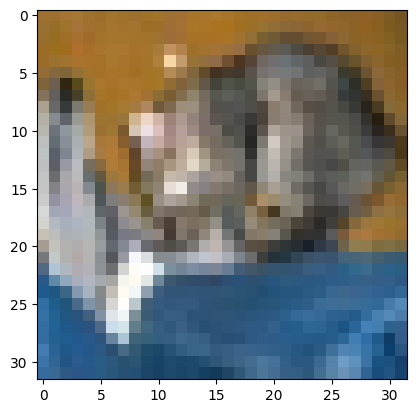

In [4]:
print(test_DS.classes)
print(test_DS.class_to_idx)
x_batch, y_batch = next(iter(test_DL))
print(x_batch.shape)

plt.imshow(x_batch[0].permute(1,2,0))
print(test_DS.classes[y_batch[0]])

In [5]:
x_batch, y_batch = next(iter(train_DL))

print(type(train_DS.data))
print(train_DS.data.shape)
print(train_DS.data.dtype)
print(train_DS.data[0][0][0][0])

print(type(x_batch))
print(x_batch.shape)
print(x_batch.dtype)
print(x_batch[0][0][0][0])

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
uint8
59
<class 'torch.Tensor'>
torch.Size([32, 3, 32, 32])
torch.float32
tensor(0.5373)


In [6]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(3 * 32 * 32, 30 , 30),
                                nn.BatchNorm1d(30),
                                nn.ReLU(),
                                nn.Linear(30,10))
  def forward(self, x):
      x = torch.flatten(x, start_dim = 1)
      x = self.linear(x)
      return x

class MLP_wider(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(3 * 32 * 32 , 100),
                                nn.BatchNorm1d(100),
                                nn.ReLU(),
                                nn.Linear(100,10))
  def forward(self,x):
    x = torch.flatten(x, start_dim = 1)
    x = self.linear(x)
    return x

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.328155
Train Epoch: 1 [3200/50000 (6%)]	Loss: 2.025479
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.759232
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.820561
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.805053
Train Epoch: 1 [16000/50000 (32%)]	Loss: 1.508187
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.686182
Train Epoch: 1 [22400/50000 (45%)]	Loss: 1.769090
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.659581
Train Epoch: 1 [28800/50000 (58%)]	Loss: 1.838854
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.699033
Train Epoch: 1 [35200/50000 (70%)]	Loss: 1.298971
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.476396
Train Epoch: 1 [41600/50000 (83%)]	Loss: 1.538821
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.552454
Train Epoch: 1 [48000/50000 (96%)]	Loss: 1.650682
Epoch 1 training loss: 1.766238879104951

Test set: Average loss: 1.7194, Accuracy: 3936/10000 (39%)

Examples of incorrect predictions:


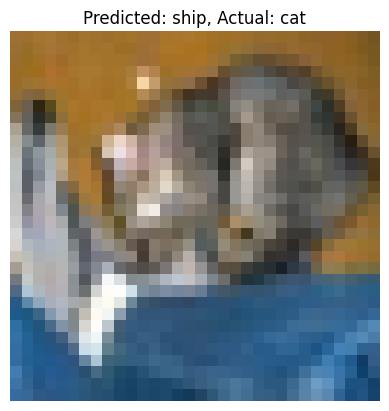

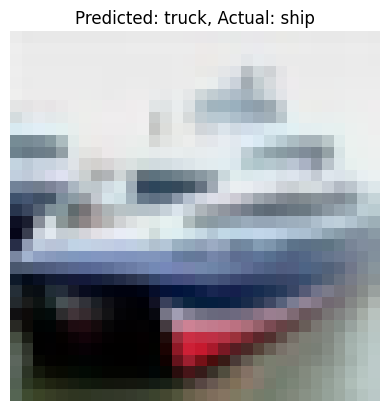

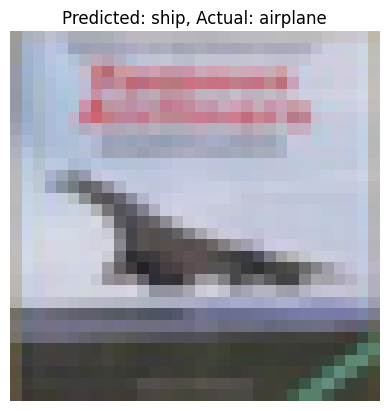

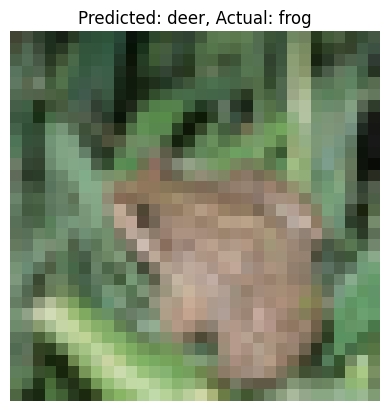

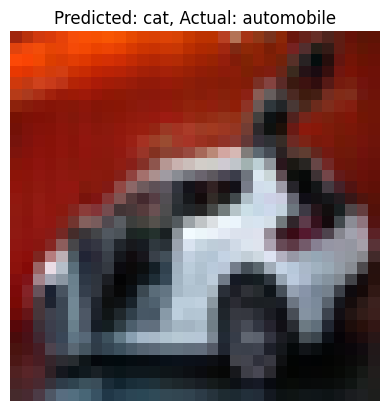

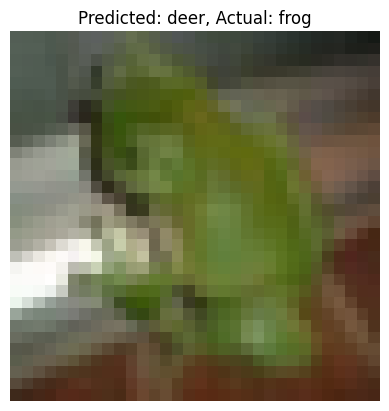

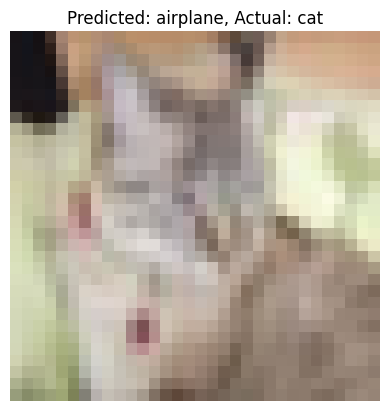

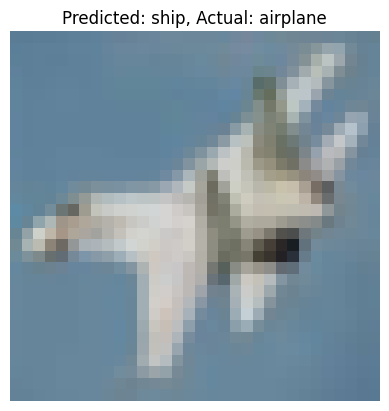

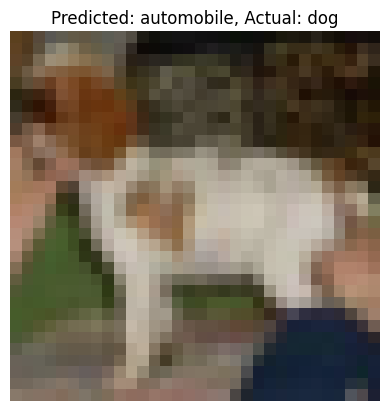

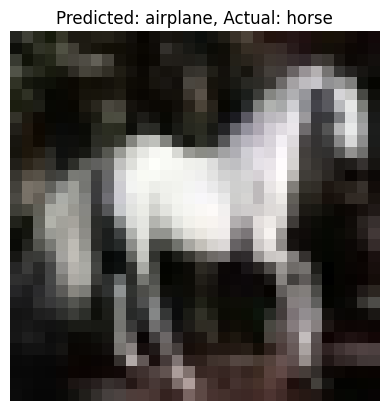

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.588226
Train Epoch: 2 [3200/50000 (6%)]	Loss: 1.374566
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.629708
Train Epoch: 2 [9600/50000 (19%)]	Loss: 2.010905
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.789650
Train Epoch: 2 [16000/50000 (32%)]	Loss: 1.434682
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.289082
Train Epoch: 2 [22400/50000 (45%)]	Loss: 1.468087
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.660743
Train Epoch: 2 [28800/50000 (58%)]	Loss: 1.757058
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.534920
Train Epoch: 2 [35200/50000 (70%)]	Loss: 1.760503
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.669654
Train Epoch: 2 [41600/50000 (83%)]	Loss: 1.697625
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.490354
Train Epoch: 2 [48000/50000 (96%)]	Loss: 1.457182
Epoch 2 training loss: 1.60655350854438

Test set: Average loss: 1.5938, Accuracy: 4247/10000 (42%)

Examples of incorrect predictions:


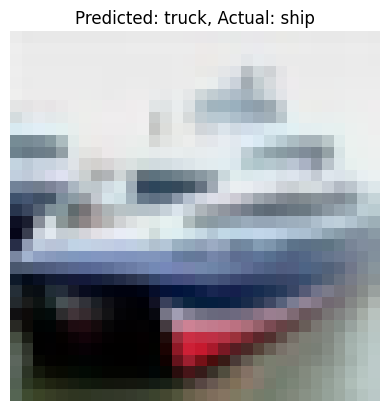

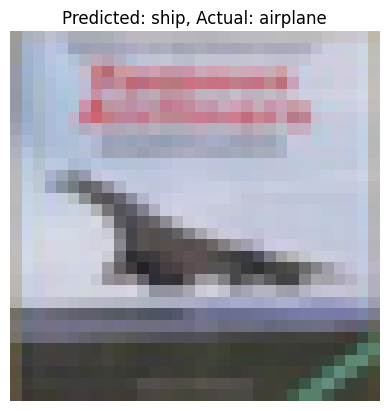

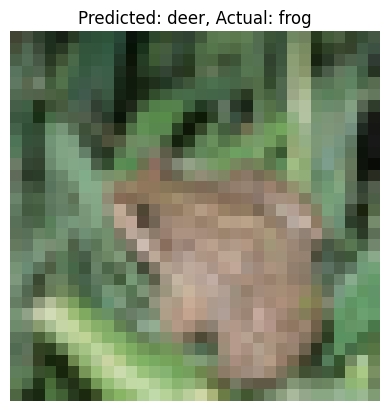

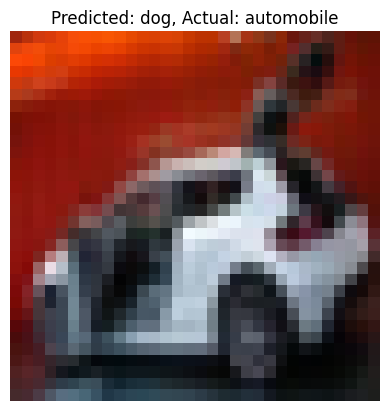

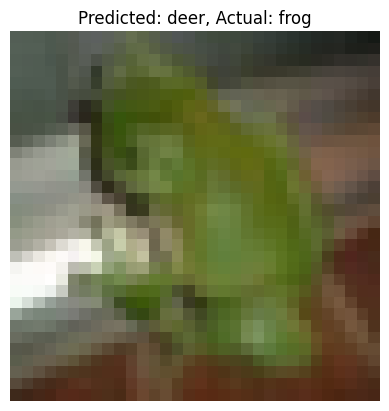

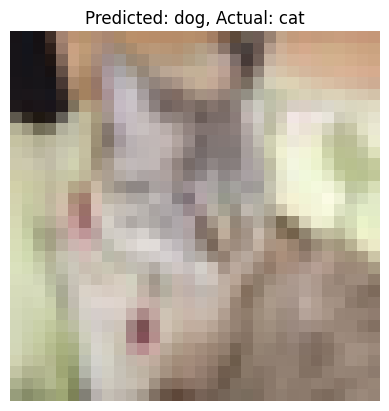

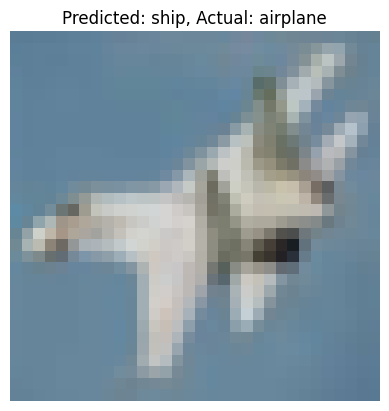

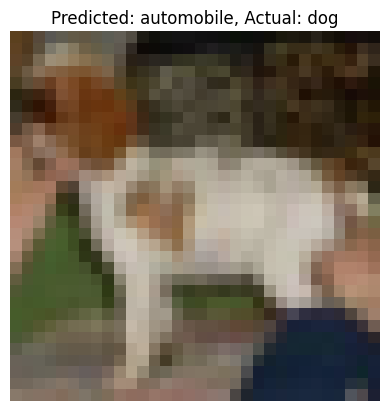

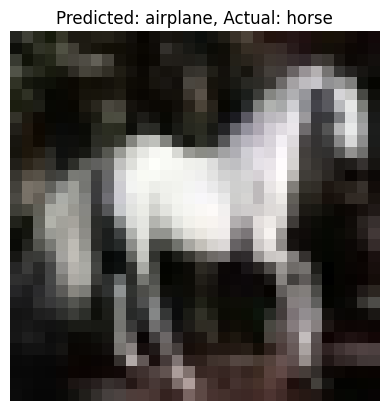

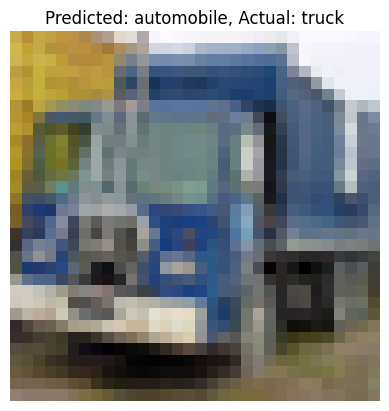

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.365474
Train Epoch: 3 [3200/50000 (6%)]	Loss: 1.517818
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.396551
Train Epoch: 3 [9600/50000 (19%)]	Loss: 1.727433
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.780758
Train Epoch: 3 [16000/50000 (32%)]	Loss: 1.864945
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.385437
Train Epoch: 3 [22400/50000 (45%)]	Loss: 1.475299
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.895812
Train Epoch: 3 [28800/50000 (58%)]	Loss: 1.581299
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.426834
Train Epoch: 3 [35200/50000 (70%)]	Loss: 1.788303
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.452572
Train Epoch: 3 [41600/50000 (83%)]	Loss: 1.534586
Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.837510
Train Epoch: 3 [48000/50000 (96%)]	Loss: 1.465155
Epoch 3 training loss: 1.5450502666844363

Test set: Average loss: 1.5516, Accuracy: 4505/10000 (45%)

Examples of incorrect predictions:


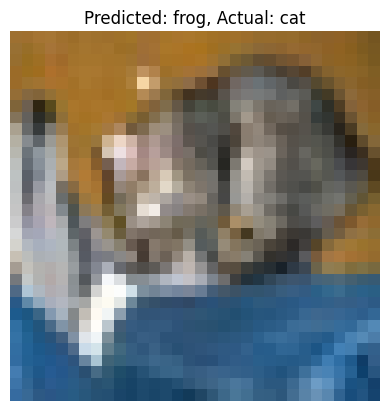

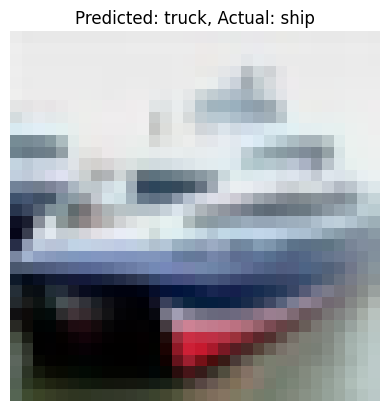

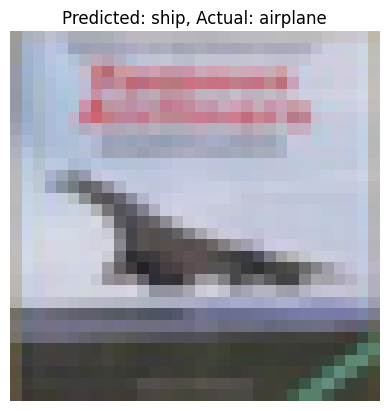

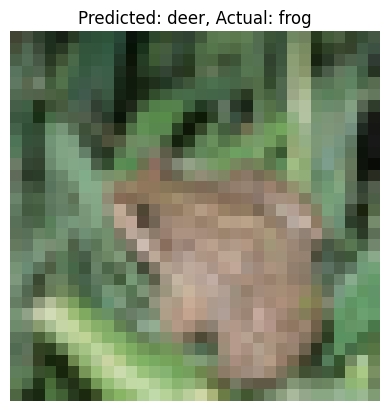

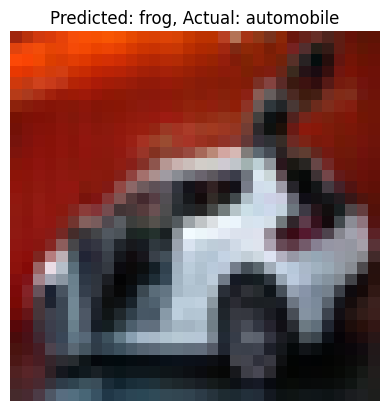

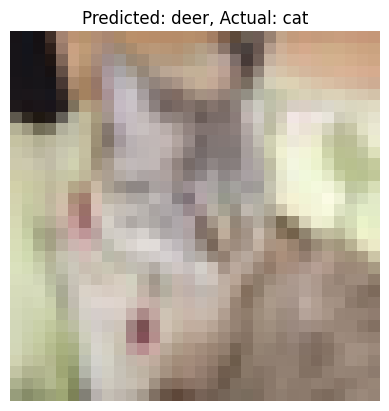

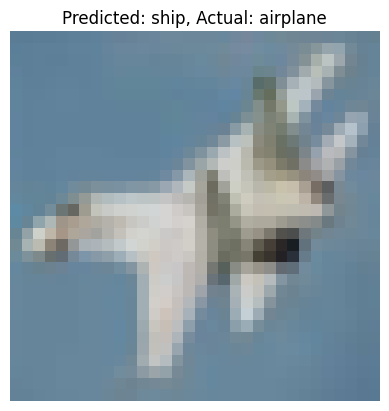

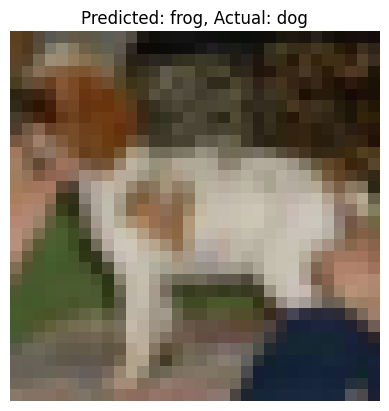

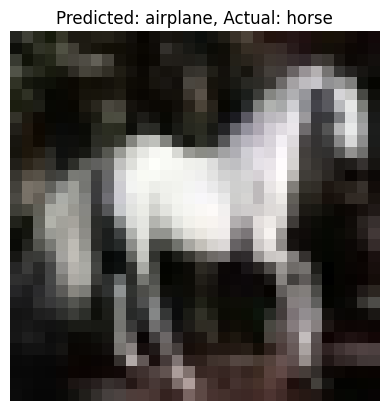

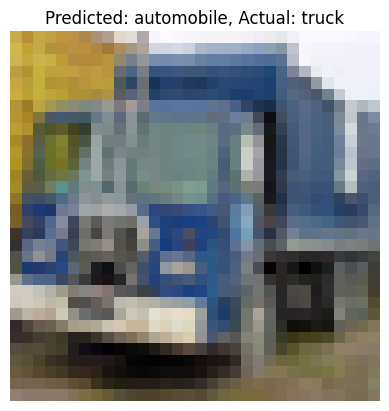

Train Epoch: 4 [0/50000 (0%)]	Loss: 1.302884
Train Epoch: 4 [3200/50000 (6%)]	Loss: 1.711483
Train Epoch: 4 [6400/50000 (13%)]	Loss: 1.857382
Train Epoch: 4 [9600/50000 (19%)]	Loss: 1.146842
Train Epoch: 4 [12800/50000 (26%)]	Loss: 1.547553
Train Epoch: 4 [16000/50000 (32%)]	Loss: 1.481215
Train Epoch: 4 [19200/50000 (38%)]	Loss: 1.613179
Train Epoch: 4 [22400/50000 (45%)]	Loss: 1.207383
Train Epoch: 4 [25600/50000 (51%)]	Loss: 1.311525
Train Epoch: 4 [28800/50000 (58%)]	Loss: 1.255146
Train Epoch: 4 [32000/50000 (64%)]	Loss: 1.491193
Train Epoch: 4 [35200/50000 (70%)]	Loss: 1.313973
Train Epoch: 4 [38400/50000 (77%)]	Loss: 1.372281
Train Epoch: 4 [41600/50000 (83%)]	Loss: 1.384112
Train Epoch: 4 [44800/50000 (90%)]	Loss: 1.593165
Train Epoch: 4 [48000/50000 (96%)]	Loss: 1.516934
Epoch 4 training loss: 1.510627227224605

Test set: Average loss: 1.5543, Accuracy: 4428/10000 (44%)

Examples of incorrect predictions:


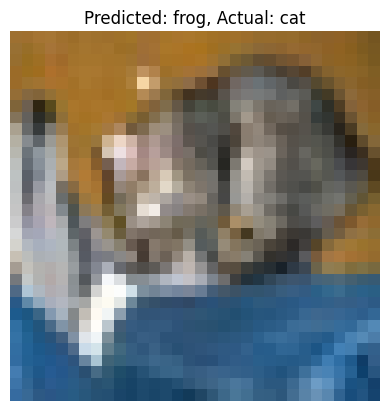

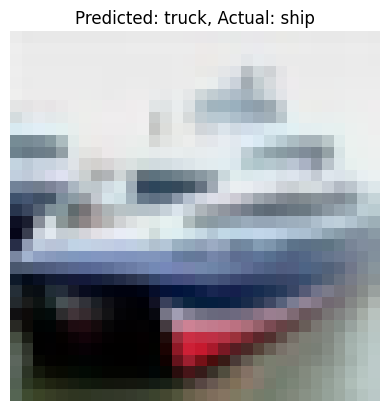

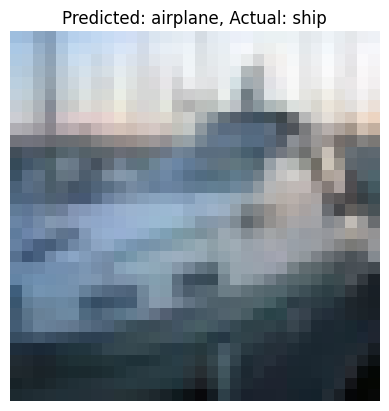

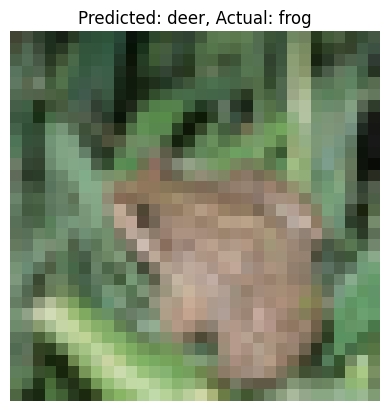

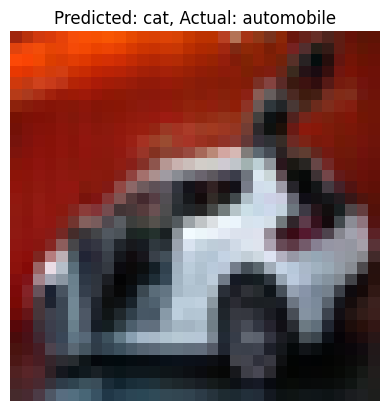

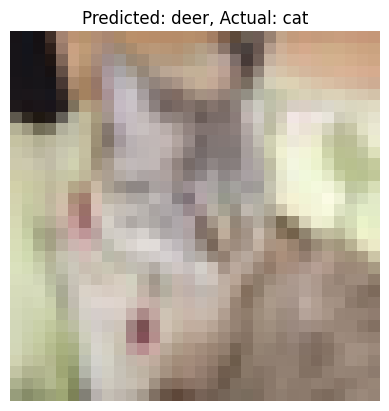

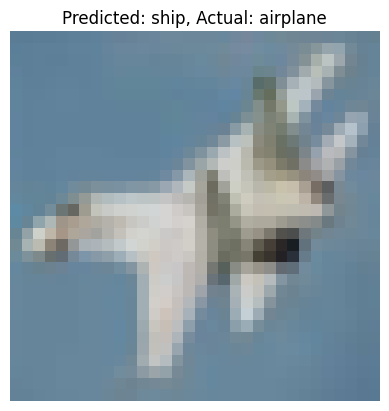

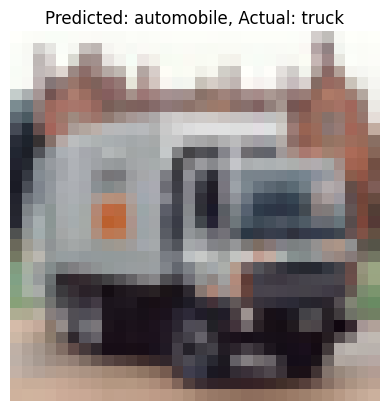

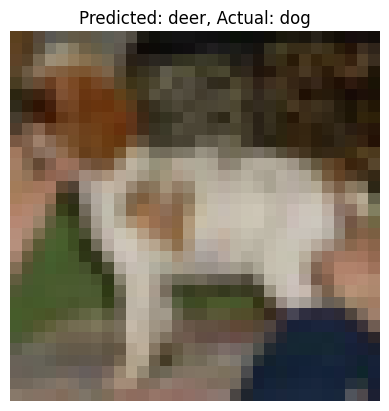

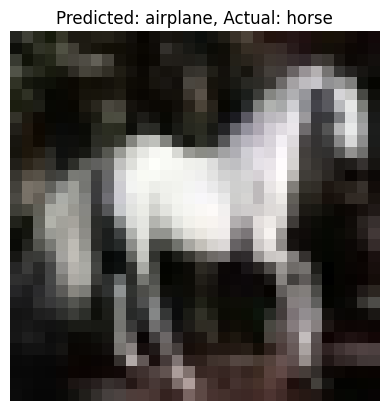

Train Epoch: 5 [0/50000 (0%)]	Loss: 1.498845
Train Epoch: 5 [3200/50000 (6%)]	Loss: 1.231848
Train Epoch: 5 [6400/50000 (13%)]	Loss: 1.410343
Train Epoch: 5 [9600/50000 (19%)]	Loss: 1.322804
Train Epoch: 5 [12800/50000 (26%)]	Loss: 1.428282
Train Epoch: 5 [16000/50000 (32%)]	Loss: 1.452505
Train Epoch: 5 [19200/50000 (38%)]	Loss: 1.424667
Train Epoch: 5 [22400/50000 (45%)]	Loss: 1.373420
Train Epoch: 5 [25600/50000 (51%)]	Loss: 1.570595
Train Epoch: 5 [28800/50000 (58%)]	Loss: 1.307353
Train Epoch: 5 [32000/50000 (64%)]	Loss: 1.362072
Train Epoch: 5 [35200/50000 (70%)]	Loss: 1.286731
Train Epoch: 5 [38400/50000 (77%)]	Loss: 1.796920
Train Epoch: 5 [41600/50000 (83%)]	Loss: 1.185918
Train Epoch: 5 [44800/50000 (90%)]	Loss: 1.246968
Train Epoch: 5 [48000/50000 (96%)]	Loss: 1.629789
Epoch 5 training loss: 1.4811479646428913

Test set: Average loss: 1.5484, Accuracy: 4486/10000 (45%)

Examples of incorrect predictions:


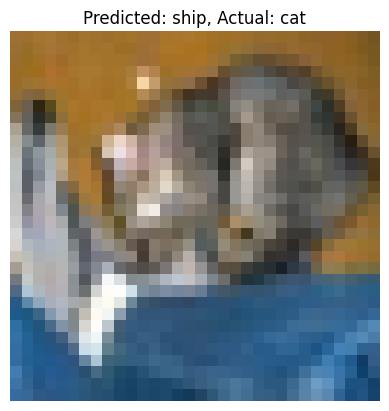

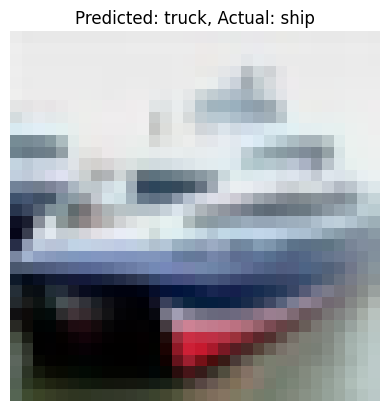

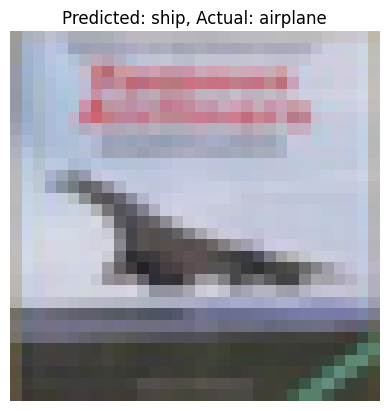

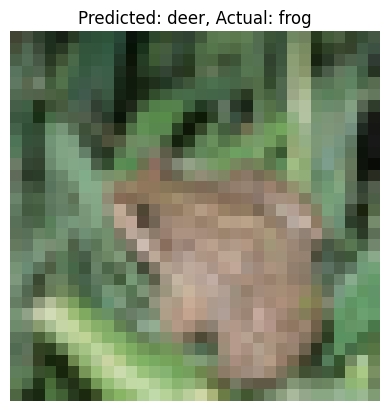

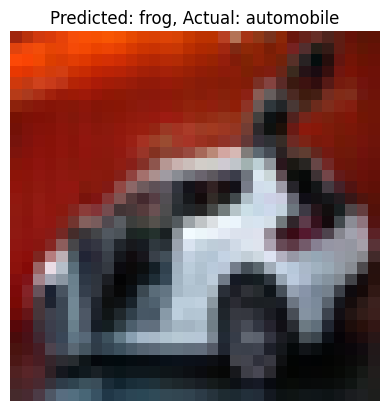

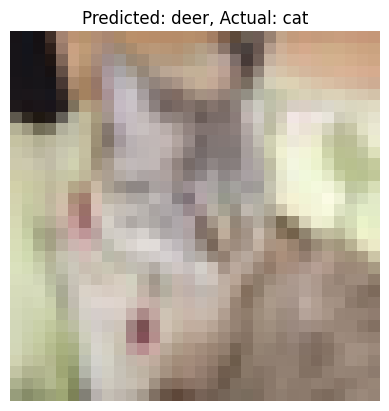

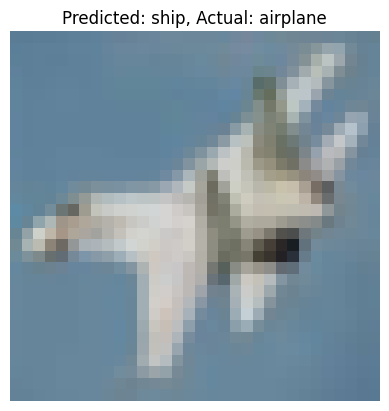

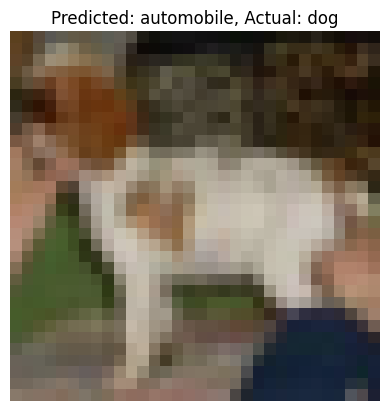

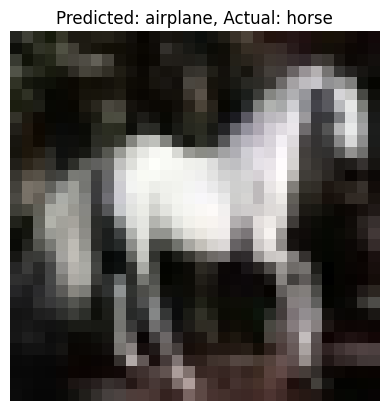

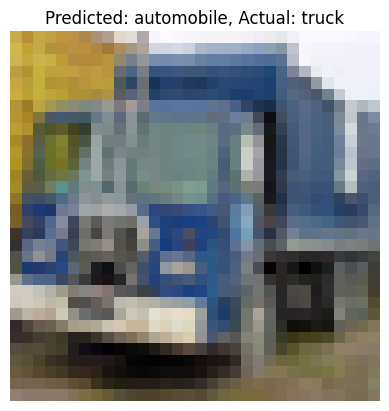

Model saved to /content/drive/MyDrive/Colab Notebooks/model.pth


In [10]:
# Instantiate the model, criterion, and optimizer
model = MLP().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LR)

# Training function
def train(model, device, train_loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    print(f'Epoch {epoch} training loss: {running_loss / len(train_loader)}')

# Evaluation function
def evaluate(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    incorrect_examples = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            # Store incorrect predictions
            incorrect_indices = ~pred.eq(target.view_as(pred)).squeeze()
            for i in range(data.size(0)):
                if incorrect_indices[i] and len(incorrect_examples) < 10: # Limit to 10 examples
                    incorrect_examples.append({
                        'image': data[i].cpu(),
                        'predicted': pred[i].item(),
                        'actual': target[i].item()
                    })


    test_loss /= len(test_loader)

    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

    # Display incorrect predictions
    print("Examples of incorrect predictions:")
    for example in incorrect_examples:
        image = example['image'].permute(1, 2, 0)
        predicted_label = test_DS.classes[example['predicted']]
        actual_label = test_DS.classes[example['actual']]

        plt.imshow(image)
        plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
        plt.axis('off')
        plt.show()


# Training loop
for epoch in range(1, EPOCH + 1):
    train(model, DEVICE, train_DL, optimizer, criterion, epoch)
    evaluate(model, DEVICE, test_DL, criterion)

# Save the model
torch.save(model.state_dict(), save_model_path)
print(f"Model saved to {save_model_path}")

In [8]:
save_model_path = '/content/drive/MyDrive/Colab Notebooks/model.pth'

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.434720
Train Epoch: 1 [3200/50000 (6%)]	Loss: 2.105752
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.806581
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.859403
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.619561
Train Epoch: 1 [16000/50000 (32%)]	Loss: 1.473252
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.502153
Train Epoch: 1 [22400/50000 (45%)]	Loss: 1.469939
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.475841
Train Epoch: 1 [28800/50000 (58%)]	Loss: 1.410100
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.540509
Train Epoch: 1 [35200/50000 (70%)]	Loss: 1.563170
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.722724
Train Epoch: 1 [41600/50000 (83%)]	Loss: 1.604345
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.501135
Train Epoch: 1 [48000/50000 (96%)]	Loss: 1.667360
Epoch 1 training loss: 1.6942858005744559

Test set: Average loss: 1.5775, Accuracy: 4410/10000(44%
)
Examples of incorrect predictions:


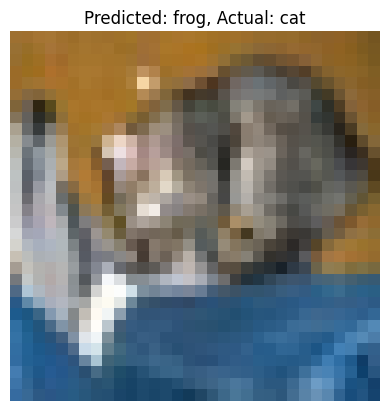

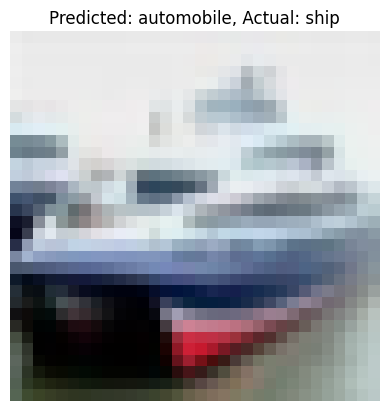

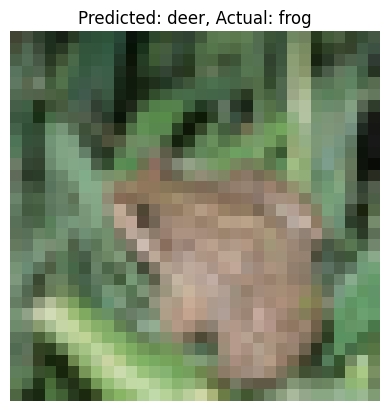

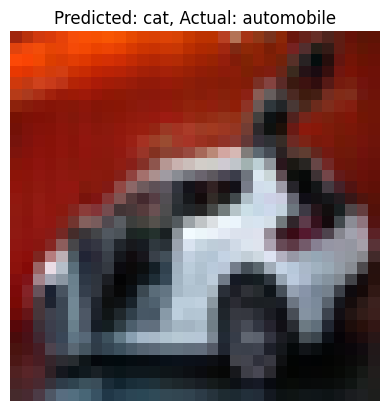

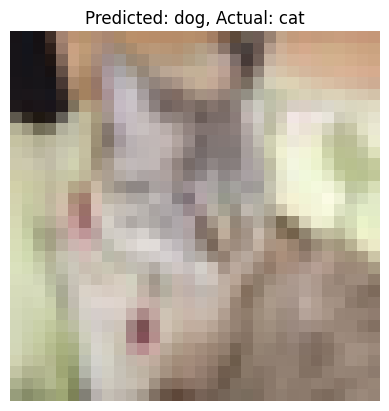

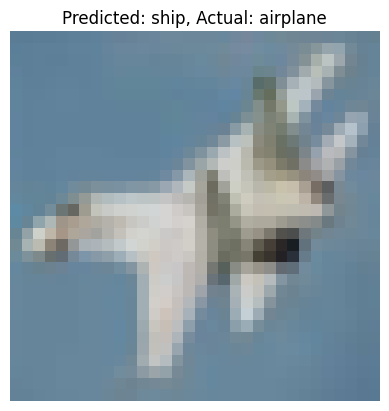

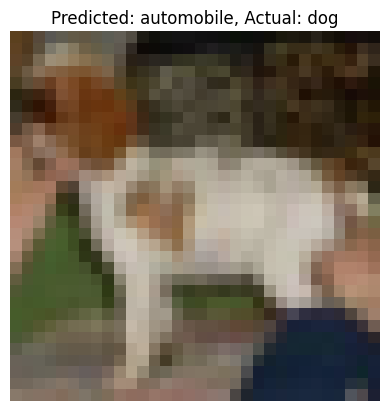

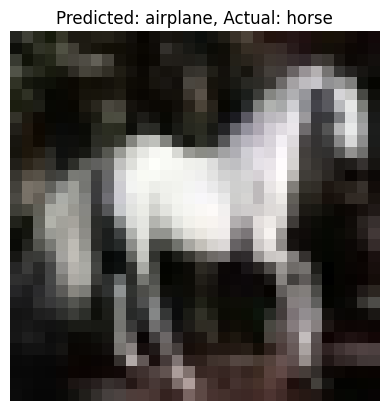

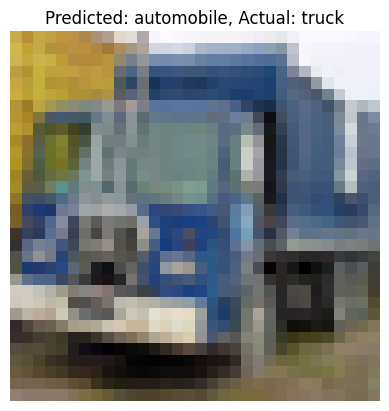

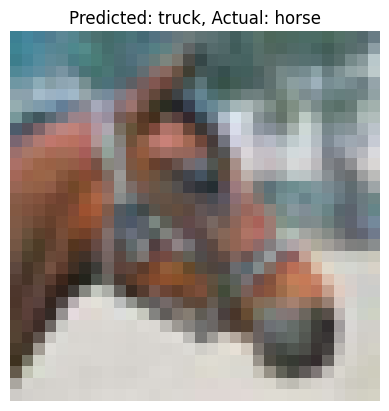

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.494285
Train Epoch: 2 [3200/50000 (6%)]	Loss: 1.719502
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.580743
Train Epoch: 2 [9600/50000 (19%)]	Loss: 1.680678
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.359971
Train Epoch: 2 [16000/50000 (32%)]	Loss: 1.554704
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.608739
Train Epoch: 2 [22400/50000 (45%)]	Loss: 1.656672
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.362698
Train Epoch: 2 [28800/50000 (58%)]	Loss: 1.730071
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.266703
Train Epoch: 2 [35200/50000 (70%)]	Loss: 1.426268
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.711775
Train Epoch: 2 [41600/50000 (83%)]	Loss: 1.501781
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.610196
Train Epoch: 2 [48000/50000 (96%)]	Loss: 1.457261
Epoch 2 training loss: 1.5188286487139424

Test set: Average loss: 1.5927, Accuracy: 4442/10000(44%
)
Examples of incorrect predictions:


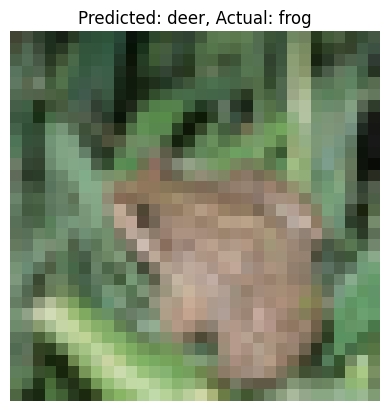

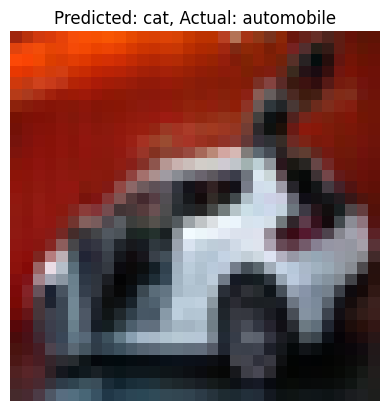

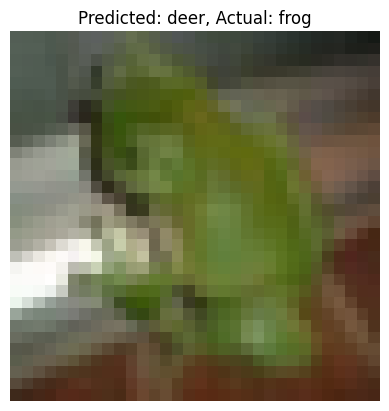

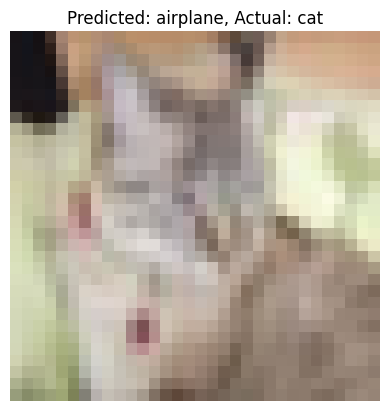

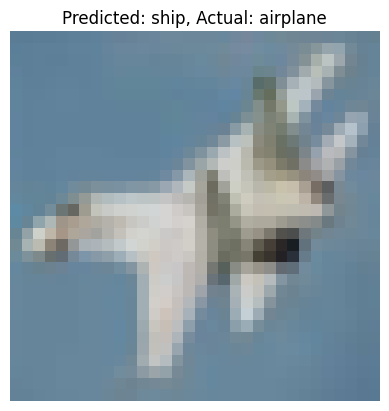

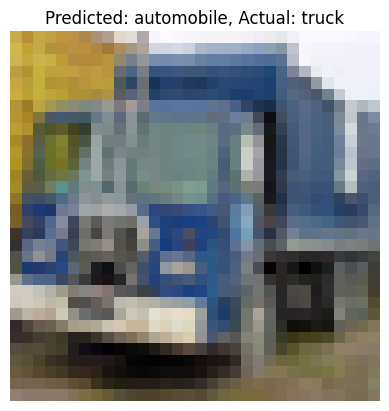

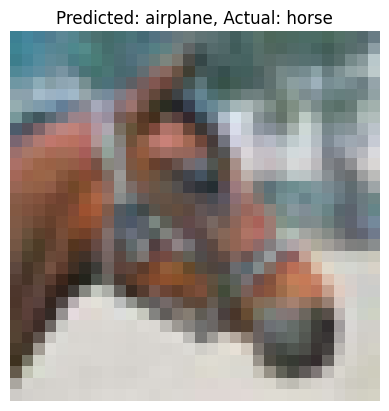

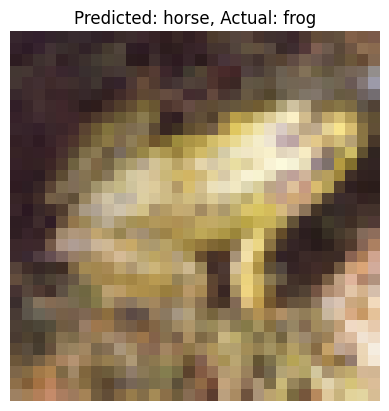

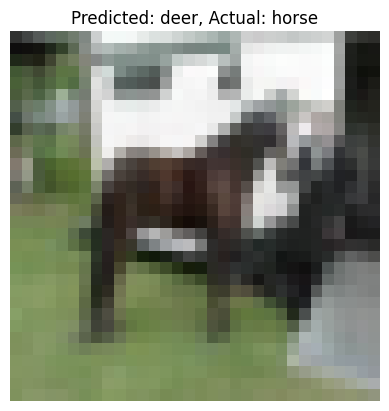

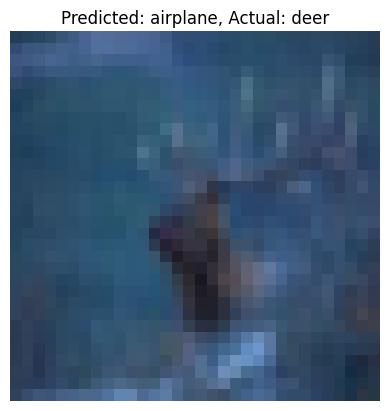

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.293665
Train Epoch: 3 [3200/50000 (6%)]	Loss: 1.466398
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.395791
Train Epoch: 3 [9600/50000 (19%)]	Loss: 1.851567
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.469878
Train Epoch: 3 [16000/50000 (32%)]	Loss: 1.243953
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.546626
Train Epoch: 3 [22400/50000 (45%)]	Loss: 1.571564
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.702453
Train Epoch: 3 [28800/50000 (58%)]	Loss: 1.483251
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.604261
Train Epoch: 3 [35200/50000 (70%)]	Loss: 1.499585
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.254276
Train Epoch: 3 [41600/50000 (83%)]	Loss: 1.406855
Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.564182
Train Epoch: 3 [48000/50000 (96%)]	Loss: 1.120203
Epoch 3 training loss: 1.4412715732097932

Test set: Average loss: 1.5089, Accuracy: 4657/10000(47%
)
Examples of incorrect predictions:


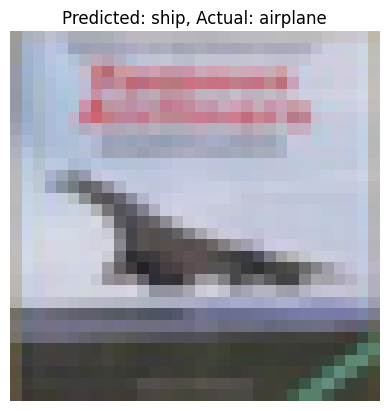

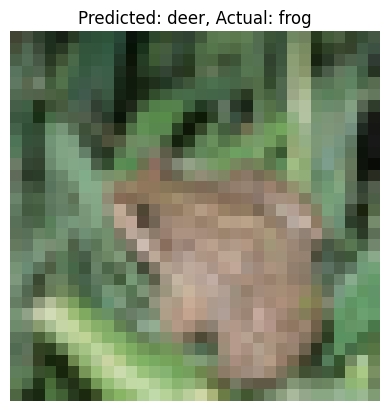

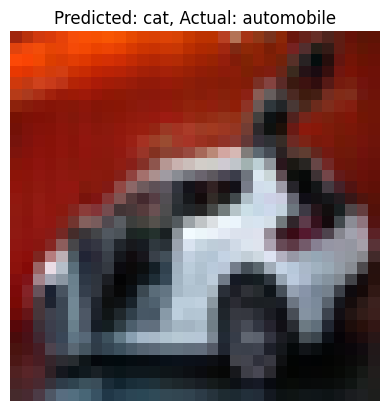

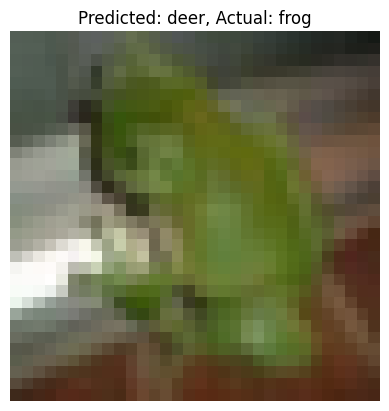

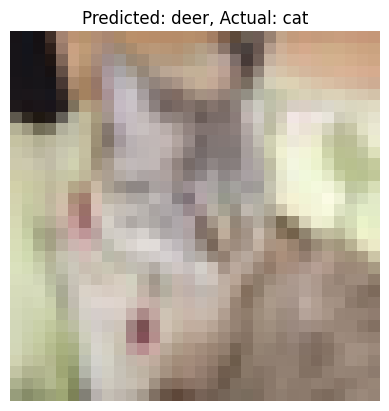

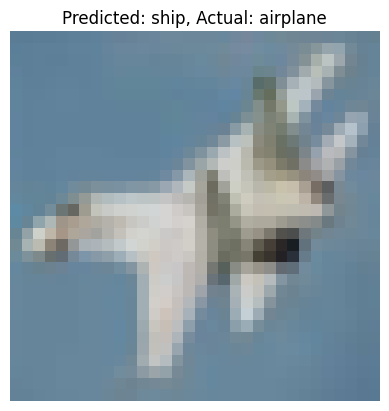

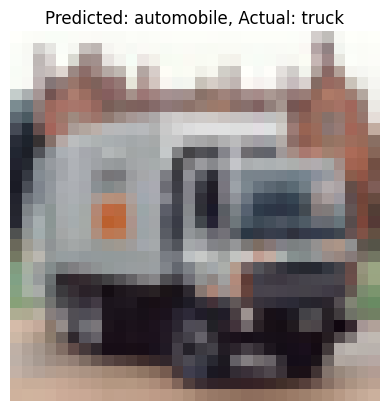

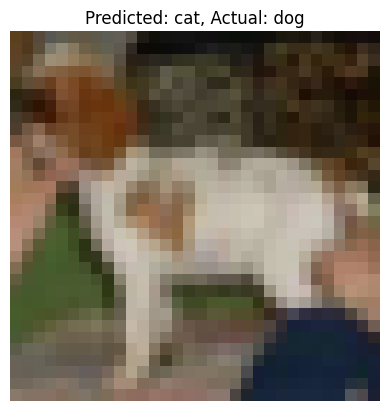

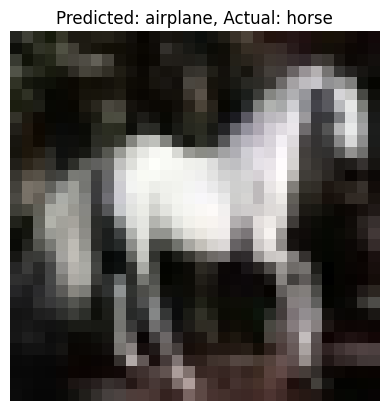

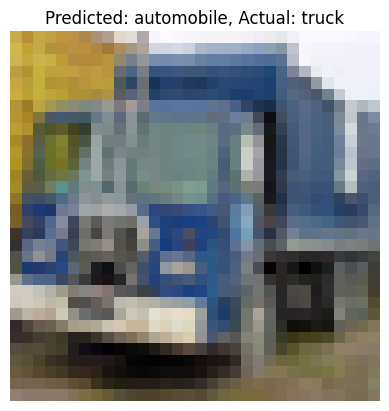

Train Epoch: 4 [0/50000 (0%)]	Loss: 1.456270
Train Epoch: 4 [3200/50000 (6%)]	Loss: 1.038292
Train Epoch: 4 [6400/50000 (13%)]	Loss: 1.411687
Train Epoch: 4 [9600/50000 (19%)]	Loss: 1.248272
Train Epoch: 4 [12800/50000 (26%)]	Loss: 1.529055
Train Epoch: 4 [16000/50000 (32%)]	Loss: 1.397678
Train Epoch: 4 [19200/50000 (38%)]	Loss: 1.250183
Train Epoch: 4 [22400/50000 (45%)]	Loss: 1.709966
Train Epoch: 4 [25600/50000 (51%)]	Loss: 1.816223
Train Epoch: 4 [28800/50000 (58%)]	Loss: 1.300016
Train Epoch: 4 [32000/50000 (64%)]	Loss: 1.349327
Train Epoch: 4 [35200/50000 (70%)]	Loss: 1.631277
Train Epoch: 4 [38400/50000 (77%)]	Loss: 1.428281
Train Epoch: 4 [41600/50000 (83%)]	Loss: 1.251865
Train Epoch: 4 [44800/50000 (90%)]	Loss: 1.157426
Train Epoch: 4 [48000/50000 (96%)]	Loss: 1.551183
Epoch 4 training loss: 1.387424591025403

Test set: Average loss: 1.4255, Accuracy: 4985/10000(50%
)
Examples of incorrect predictions:


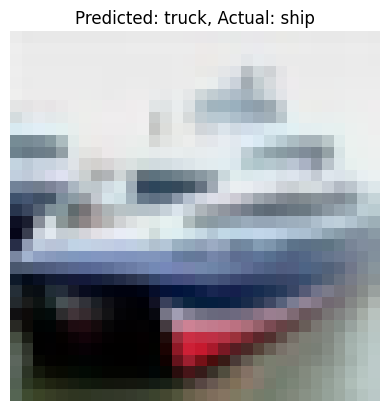

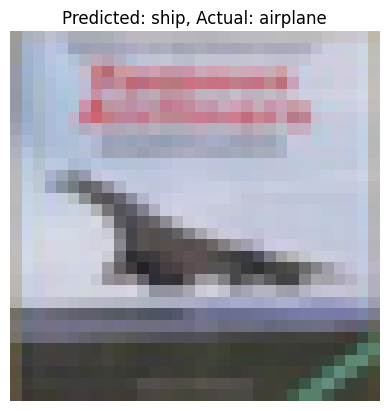

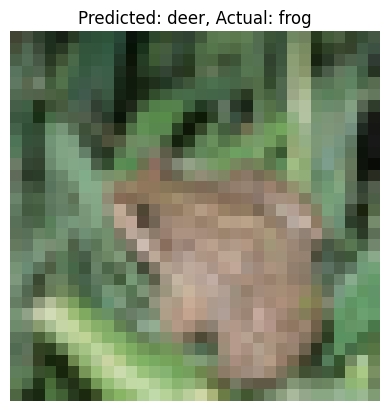

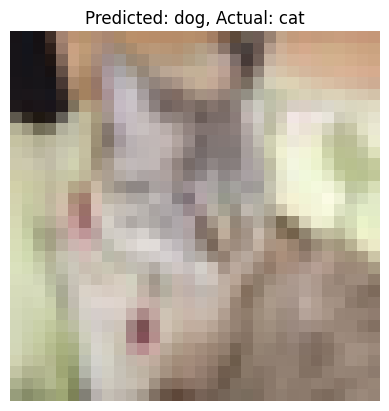

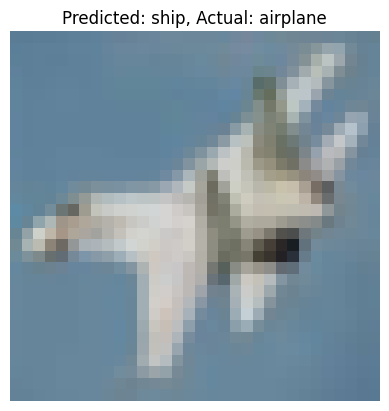

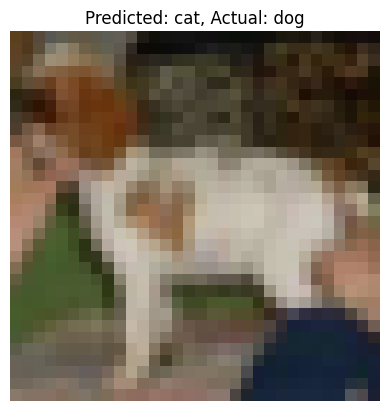

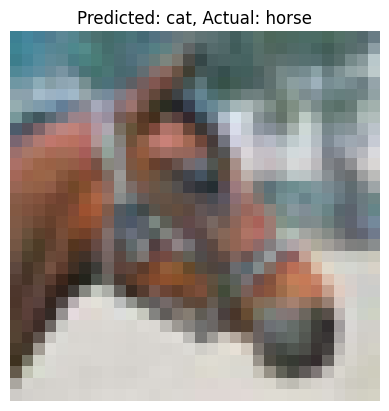

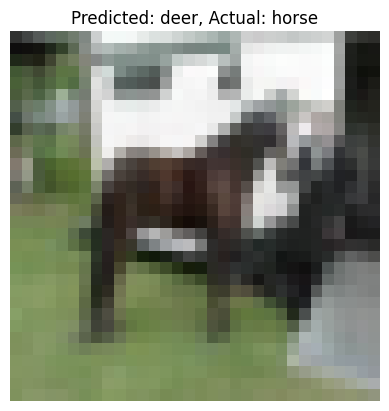

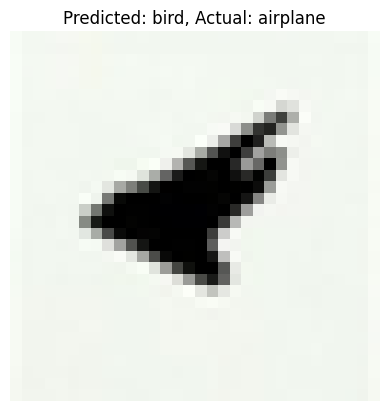

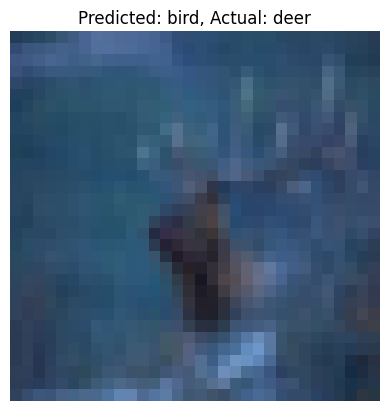

Train Epoch: 5 [0/50000 (0%)]	Loss: 1.121460
Train Epoch: 5 [3200/50000 (6%)]	Loss: 1.584471
Train Epoch: 5 [6400/50000 (13%)]	Loss: 1.156465
Train Epoch: 5 [9600/50000 (19%)]	Loss: 1.172982
Train Epoch: 5 [12800/50000 (26%)]	Loss: 1.425225
Train Epoch: 5 [16000/50000 (32%)]	Loss: 1.026109
Train Epoch: 5 [19200/50000 (38%)]	Loss: 1.163247
Train Epoch: 5 [22400/50000 (45%)]	Loss: 1.271290
Train Epoch: 5 [25600/50000 (51%)]	Loss: 1.330643
Train Epoch: 5 [28800/50000 (58%)]	Loss: 1.459398
Train Epoch: 5 [32000/50000 (64%)]	Loss: 1.266769
Train Epoch: 5 [35200/50000 (70%)]	Loss: 1.574849
Train Epoch: 5 [38400/50000 (77%)]	Loss: 1.335718
Train Epoch: 5 [41600/50000 (83%)]	Loss: 1.276768
Train Epoch: 5 [44800/50000 (90%)]	Loss: 1.370579
Train Epoch: 5 [48000/50000 (96%)]	Loss: 1.444972
Epoch 5 training loss: 1.345592086771247

Test set: Average loss: 1.4597, Accuracy: 4823/10000(48%
)
Examples of incorrect predictions:


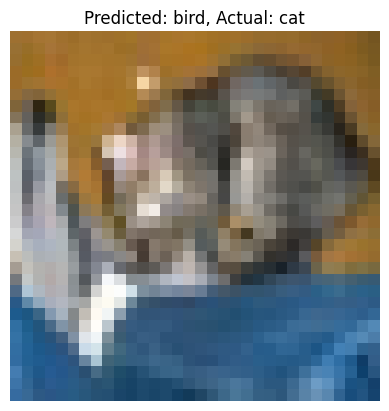

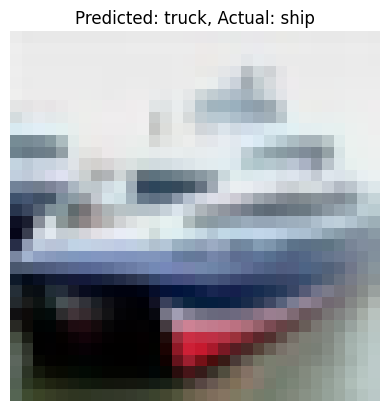

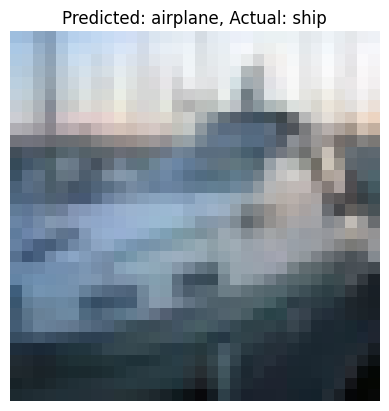

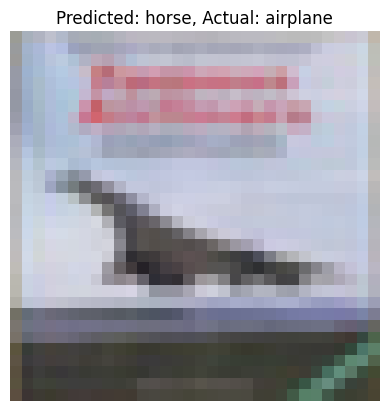

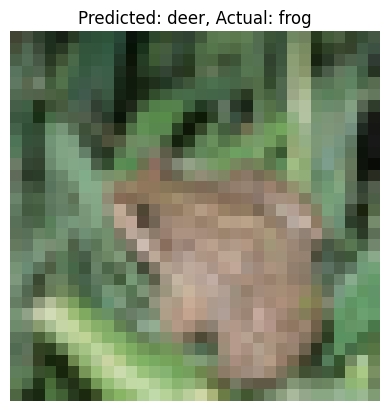

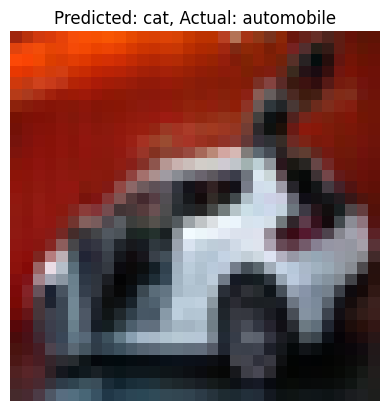

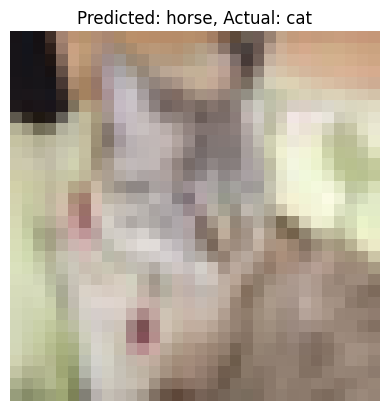

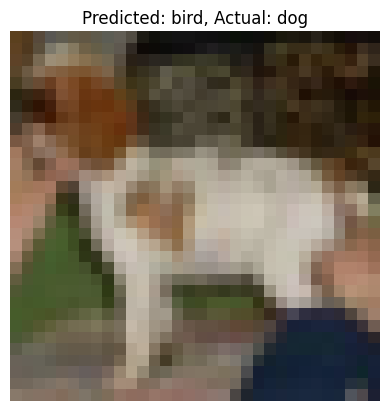

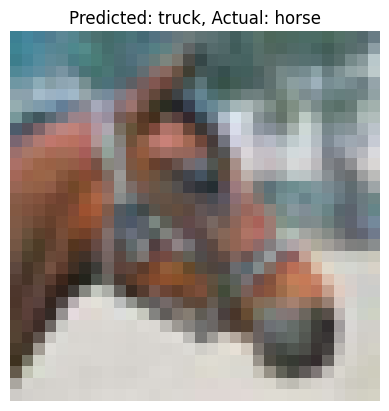

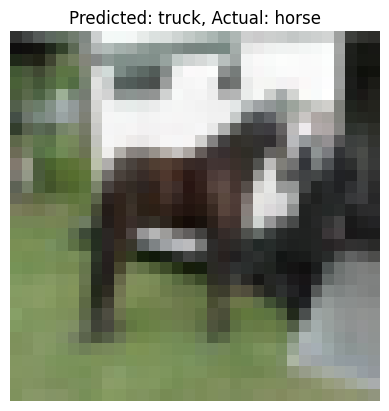

Model saved to /content/drive/MyDrive/Colab Notebooks/model.pth


In [13]:
model = MLP_wider().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = LR)

def train(model, device, train_loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    print(f'Epoch {epoch} training loss: {running_loss / len(train_loader)}')

def evaluate(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    incorrect_examples = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim= True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            incorrect_indices = ~pred.eq(target.view_as(pred)).squeeze()

            for i in range(data.size(0)):
                if incorrect_indices[i] and len(incorrect_examples) < 10:
                    incorrect_examples.append({
                        'image':data[i].cpu(),
                        'predicted':pred[i].item(),
                        'actual':target[i].item()
                    })

    test_loss /= len(test_loader)

    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)}({100.* correct / len(test_loader.dataset):.0f}%\n)')

    # Display incorrect predictions
    print("Examples of incorrect predictions:")
    for example in incorrect_examples:
        image = example['image'].permute(1, 2, 0)
        predicted_label = test_DS.classes[example['predicted']]
        actual_label = test_DS.classes[example['actual']]

        plt.imshow(image)
        plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
        plt.axis('off')
        plt.show()


# Training loop
for epoch in range(1, EPOCH + 1):
    train(model, DEVICE, train_DL, optimizer, criterion, epoch)
    evaluate(model, DEVICE, test_DL, criterion)

# Save the model
torch.save(model.state_dict(), save_model_path)
print(f"Model saved to {save_model_path}")